# **2023**

## ***Jun 8 2023***

Энергия Kch для одного захода без точки пучка в фите и с ней:
<div>
<img src="PictureDump/KchEnergy_NoBeamPoint_run61683.png" alt="Drawing" style="width: 550px;"/>
<img src="PictureDump/KchEnergy_WithBeamPoint_run61683.png" alt="Drawing" style="width: 550px;"/>
</div>

Импульс Kch для одного захода без точки пучка в фите и с ней:
<div>
<img src="PictureDump/KchMom_NoBeamPoint_run61683.png" alt="Drawing" style="width: 550px;"/>
<img src="PictureDump/KchMom_WithBeamPoint_run61683.png" alt="Drawing" style="width: 550px;"/>
</div>

## ***Jun 9 2023***

MC KsKl with shifted up by 30 keV energy (aka WrongEnergy) Mass:
<div>
<img src="PictureDump/KsMass_WrongEnergy.png" alt="Drawing" style="width: 700px;"/>
</div>

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

E = np.array([508.5, 509, 509.5, 510, 510.5, 511])
M_RCNC = np.array([497.575, 497.582, 497.588, 497.588, 497.588, 497.593])
M_RCNC_err = np.array([0.002, 0.002, 0.003, 0.003, 0.003, 0.003])

M_fit = curve_fit(lambda x, a: a, E, M_RCNC, sigma=M_RCNC_err)
print('M_fit =', np.round(M_fit[0][0], 3), 'MeV')

# plt.errorbar(x=E, y=M_RCNC, yerr=M_RCNC_err, fmt='.')
# plt.show()


M_fit = 497.584 MeV


## ***Jun 10 2023***

Energy control via $K^{\pm}$ without beam point:

In [ ]:
energy_points = np.array([510])
E_Kch_exp = np.array([])
E_Kch_exp_Err = np.array([])

emeas_MC = np.array([509.95])
emeas_MC_err = np.array([0.007])
E_Kch_MC = np.array([506.249])
E_Kch_MC_Err = np.array([0.005])


## ***Jun 13 2023***

$\Delta E$ data - MC with and without beam point:
<div>
<img src="PictureDump/deltaE_dataMC_diff_withBeamPoint.png" alt="Drawing" style="width: 550px;"/>
<img src="PictureDump/deltaE_dataMC_diff_noBeamPoint.png" alt="Drawing" style="width: 550px;"/>
</div>

## ***Jun 14***

ISR radiative correction pretty much has no difference with or without energy spread. Previous RC is still good.

In [2]:
import numpy as np

energies = np.array([508, 508.5, 510])
RC_MC = np.array([0.082, 0.078, 0.106])
RC_smeared_MC = np.array([0.084, 0.078, 0.110])

m = np.array([497.577, 497.568, 497.533, 497.554, 497.544, 497.57, 497.589, 497.568, 497.604])
RC = np.array([0.1, 0.099, 0.089, 0.08, 0.071, 0.116, 0.191, 0.334, 1.453])
print(list(np.round(m + RC, 3)))


[497.677, 497.667, 497.622, 497.634, 497.615, 497.686, 497.78, 497.902, 499.057]


I've started working on PhiMesonFit. 
There are some params for $e^+ e^- \rightarrow \phi \rightarrow K_S K_L$ for RHO2018 season.

## ***Jun 19***

[ 8.32336516e-05 -8.67790064e-05 -7.87800605e-05 -1.35558524e-04
  2.56569186e-04  6.43199000e-04  9.71353554e-04  1.40800130e-03
  2.54949229e-03]
[497.57699999 497.56799999 497.53300003 497.55399999 497.54400002
 497.57       497.58900001 497.56800001 497.60400002]


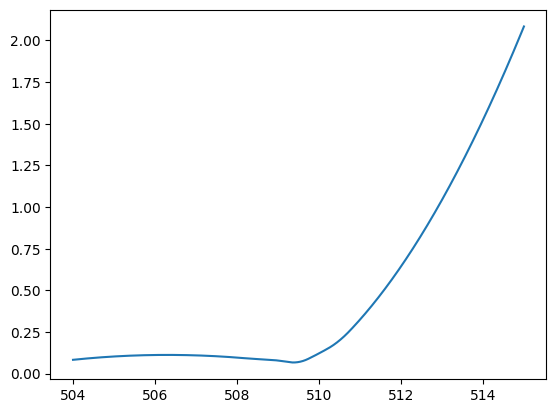

In [9]:
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline 
from scipy.optimize import minimize, curve_fit
from matplotlib import pyplot as ppt


M_RCNC = np.array([497.577, 497.568, 497.533, 497.554, 497.544, 497.57, 497.589, 497.568, 497.604])
RC_data = np.array([0.1, 0.099, 0.089, 0.08, 0.071, 0.116, 0.191, 0.334, 1.453])
E = np.array([504.8, 507.862, 508.404, 508.957, 509.528, 509.956, 510.458, 511.035, 513.864])
M_vis = np.round(M_RCNC + RC_data, 3)

def interpolate(x: np.ndarray, y: np.ndarray, energy_range: tuple)->tuple[np.ndarray, np.ndarray]:
    
    data = np.array([x, y]).T 
    data2 = data[data[:,0].argsort()]
    spline = make_interp_spline(data2[:, 0], data2[:, 1], k=2)

    xs = np.linspace(energy_range[0], energy_range[1], 10000)
    return xs, spline(xs)

energy_range, RC_interp = interpolate(E, RC_data, (504, 515))
energy_range, M_vis_interp = interpolate(E, M_vis, (504, 515))

def Get_RC(energy: float | np.ndarray)->float | np.ndarray:
    return np.interp(energy, energy_range, RC_interp)

def Get_M_vis(energy: float | np.ndarray)->float | np.ndarray:
    return np.interp(energy, energy_range, M_vis_interp)


ppt.plot(energy_range, RC_interp)
# ppt.draw()

M_fit = curve_fit(lambda x, a: a, E, M_RCNC, sigma=M_RCNC_err)
print('M_fit =', np.round(M_fit[0][0], 3), 'MeV')

def FCN(delta: float)->float:
    return (Get_M_vis(E) - Get_RC(E + delta)) - #mean(Get_M_vis(E) - Get_RC(E + delta)) -> minimize